In [18]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn

torch.set_printoptions(edgeitems=2, linewidth=75)

In [19]:
seq_model = nn.Sequential(
            nn.Linear(1, 11), # <1>
            nn.Tanh(),
            nn.Linear(11, 1)) # <1>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=11, bias=True)
  (1): Tanh()
  (2): Linear(in_features=11, out_features=1, bias=True)
)

In [20]:
from collections import OrderedDict

namedseq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 12)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(12 , 1))
]))

namedseq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=12, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=12, out_features=1, bias=True)
)

In [21]:
class SubclassModel(nn.Module):
    def __init__(self):
        super().__init__()  # <1>
        
        self.hidden_linear = nn.Linear(1, 13)
        self.hidden_activation = nn.Tanh()
        self.output_linear = nn.Linear(13, 1)
        
    def forward(self, input):
        hidden_t = self.hidden_linear(input)
        activated_t = self.hidden_activation(hidden_t)
        output_t = self.output_linear(activated_t)
        
        return output_t
    
subclass_model = SubclassModel()
subclass_model

SubclassModel(
  (hidden_linear): Linear(in_features=1, out_features=13, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=13, out_features=1, bias=True)
)

In [22]:
for type_str, model in [('seq', seq_model),
                        ('namedseq', namedseq_model),
                        ('subclass', subclass_model)]:
    print(type_str)
    for name_str, param in model.named_parameters():
        print("{:21} {:19} {}".format(
            name_str, str(param.shape), param.numel()))
        
    print()

seq
0.weight              torch.Size([11, 1]) 11
0.bias                torch.Size([11])    11
2.weight              torch.Size([1, 11]) 11
2.bias                torch.Size([1])     1

namedseq
hidden_linear.weight  torch.Size([12, 1]) 12
hidden_linear.bias    torch.Size([12])    12
output_linear.weight  torch.Size([1, 12]) 12
output_linear.bias    torch.Size([1])     1

subclass
hidden_linear.weight  torch.Size([13, 1]) 13
hidden_linear.bias    torch.Size([13])    13
output_linear.weight  torch.Size([1, 13]) 13
output_linear.bias    torch.Size([1])     1



In [23]:
class SubclassFunctionalModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.hidden_linear = nn.Linear(1, 14)  
                                                # <1>
        self.output_linear = nn.Linear(14, 1)
        
    def forward(self, input):
        hidden_t = self.hidden_linear(input)
        activated_t = torch.tanh(hidden_t) # <2>
        output_t = self.output_linear(activated_t)
        
        return output_t
    
func_model = SubclassFunctionalModel()
func_model

SubclassFunctionalModel(
  (hidden_linear): Linear(in_features=1, out_features=14, bias=True)
  (output_linear): Linear(in_features=14, out_features=1, bias=True)
)

********************
Adagrad
w=1.5132848024368286
b=0.10306841880083084
y_pred=tensor([[6.1562]])
y_pred=tensor([[15.2359]])
********************
Adam


/Users/xuzhao/Desktop/ml/dlwpt-code/venv/lib/python3.9/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


w=1.9830442667007446
b=0.03760388121008873
y_pred=tensor([[7.9698]])
y_pred=tensor([[19.8680]])
********************
Adamax
w=1.5753188133239746
b=0.9418594837188721
y_pred=tensor([[7.2431]])
y_pred=tensor([[16.6950]])
********************
ASGD
w=1.9999457597732544
b=0.00010938484774669632
y_pred=tensor([[7.9999]])
y_pred=tensor([[19.9996]])
********************
RMSprop
w=2.005249261856079
b=0.005249361507594585
y_pred=tensor([[8.0262]])
y_pred=tensor([[20.0577]])
********************
Rprop


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

w=1.999999761581421
b=-6.810145123381517e-07
y_pred=tensor([[8.0000]])
y_pred=tensor([[20.0000]])
********************
SGD
w=1.9999977350234985
b=4.847855961997993e-06
y_pred=tensor([[8.0000]])
y_pred=tensor([[20.0000]])


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

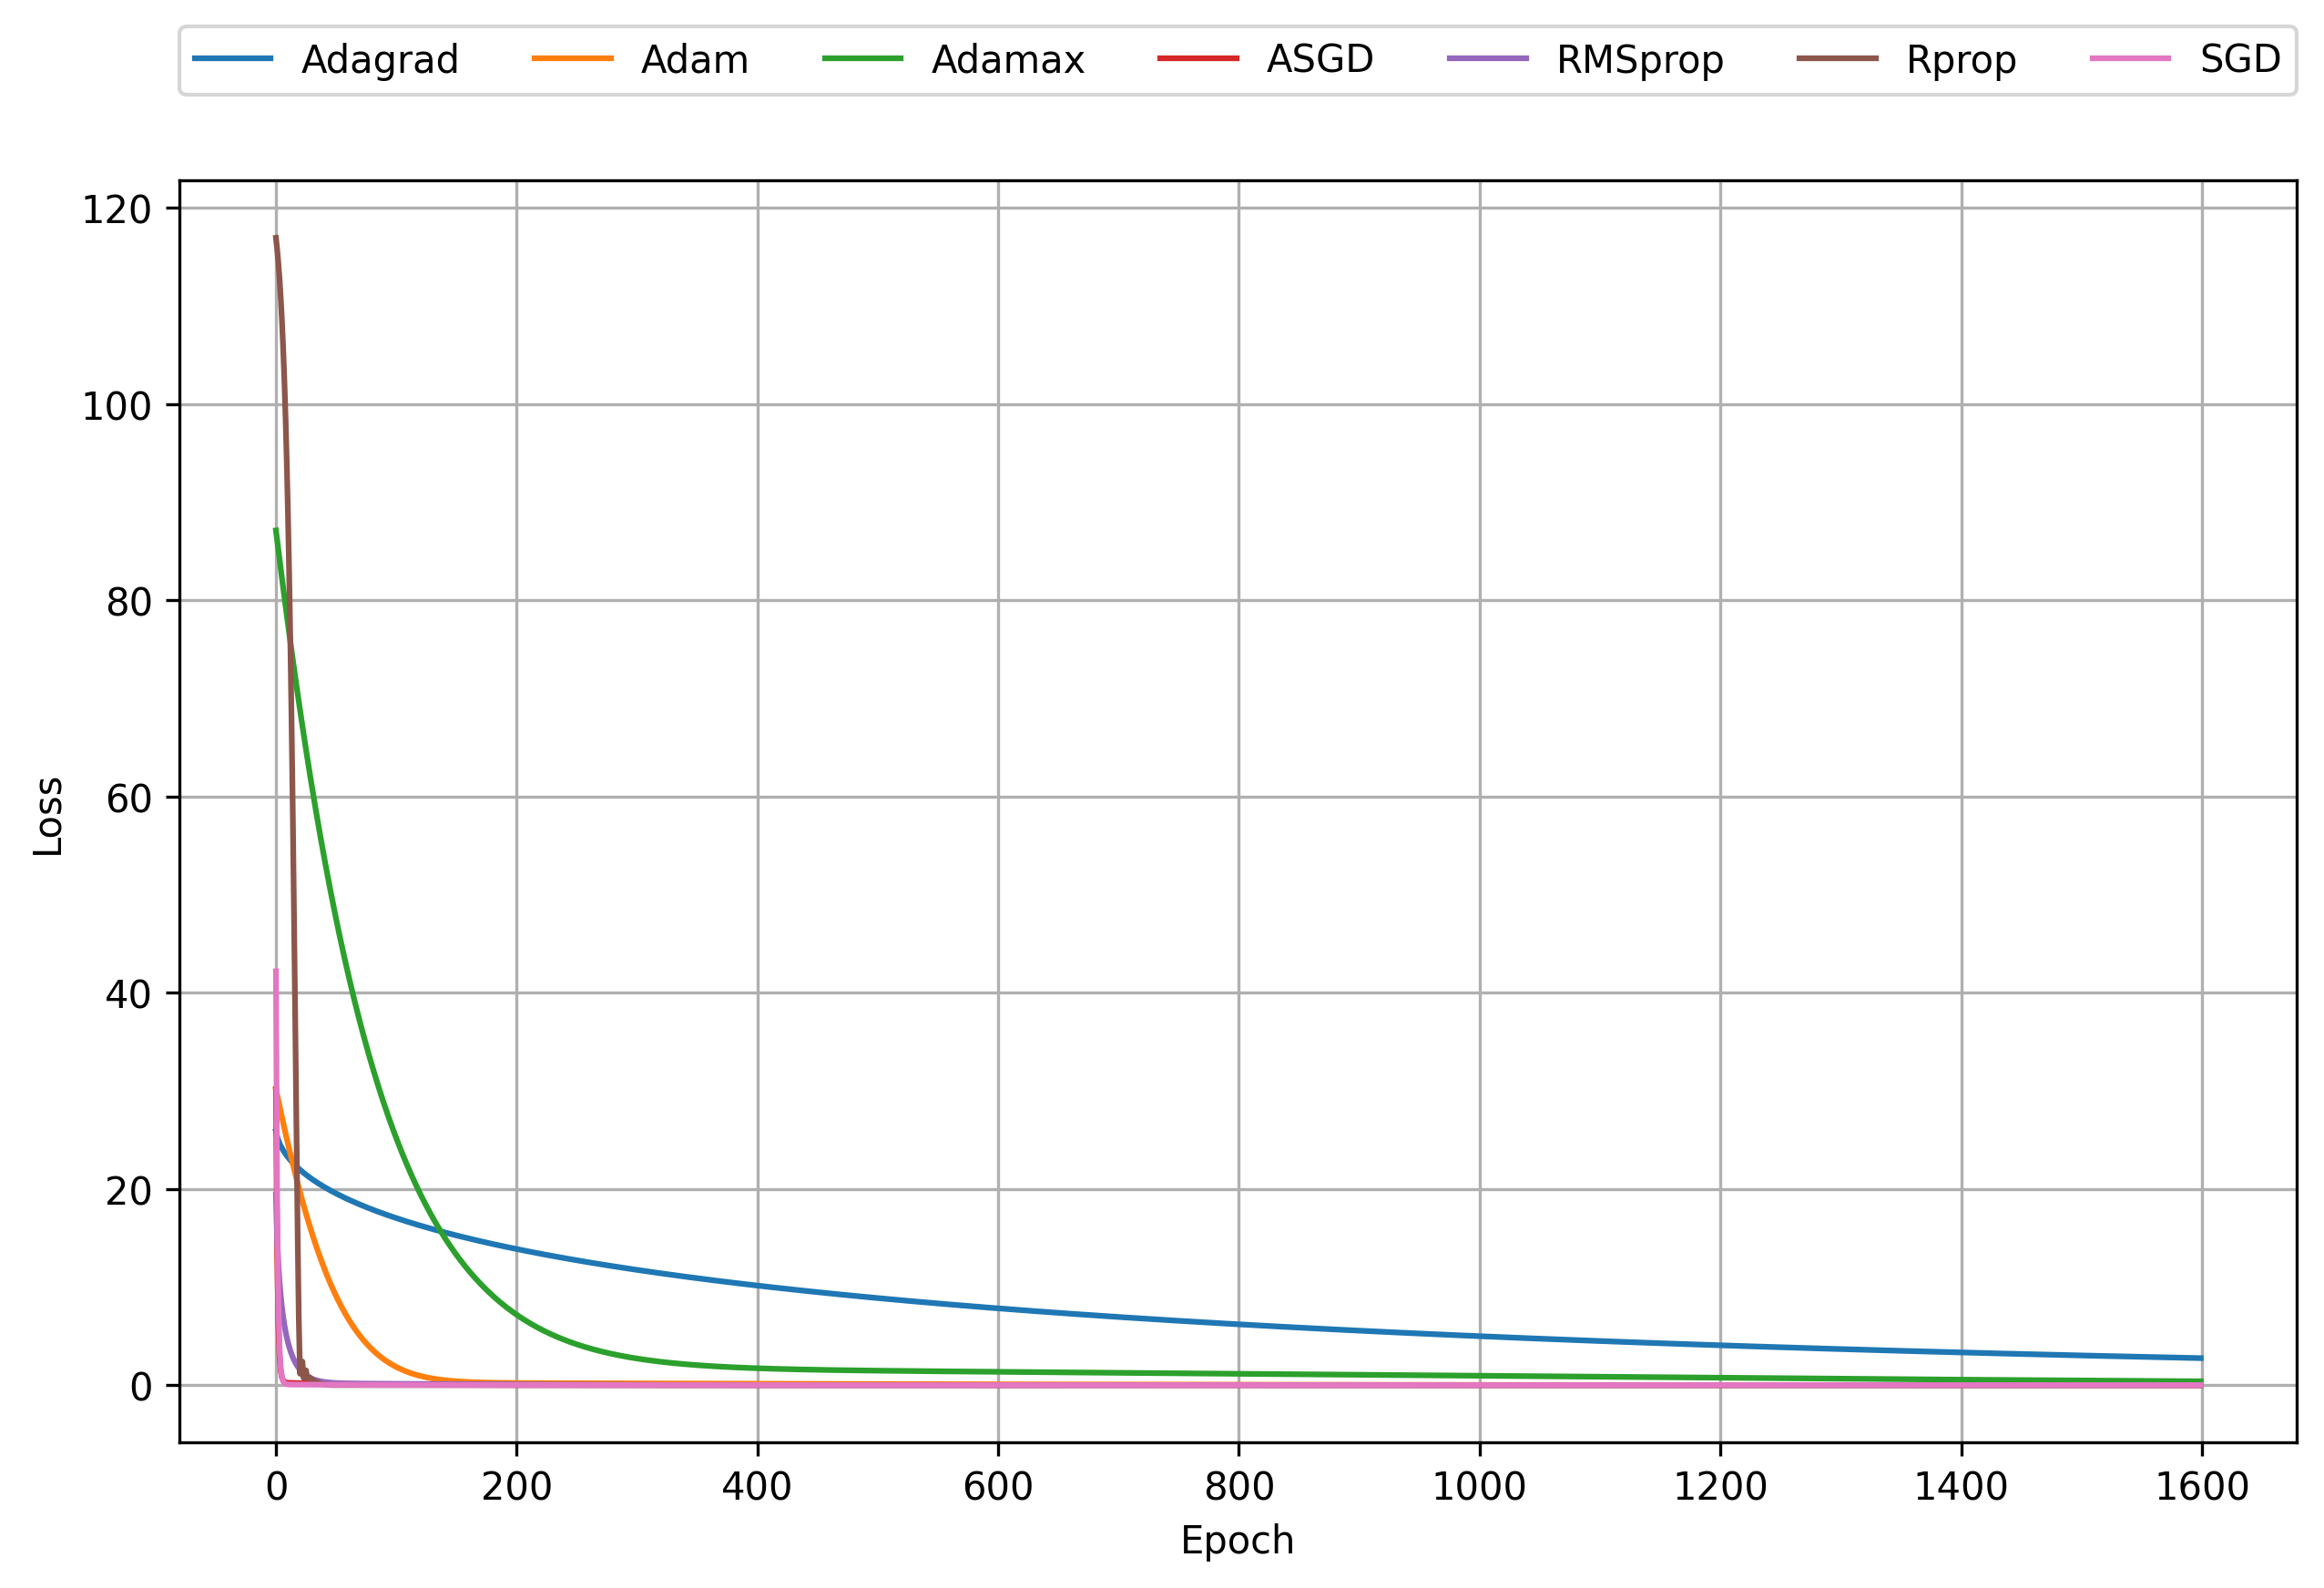

In [40]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1)

# name = ["SGD"]
# Pytorch中的数据等均为Tensor变量，即矩阵
x_data = torch.Tensor([[1],[2],[3]]) # 相当于一个numpy.array
y_data = torch.Tensor([[2],[4],[6]])

class LinerModel(torch.nn.Module):
    def __init__(self):
        # super 父类，调用父类的构造，这一步必须有
        # 第一个参数为定义类的名称，第二个为self
        super(LinerModel, self).__init__()
        '''构造一个对象，包含了权重与偏置Tensor
        Linear是属于Module的，因此可以自动实现前馈和反馈的计算
        nn：neural network的简写'''
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        # 实际上是类的重写，该函数实际上已经在里面被写入了，这里需要重写一下
        # 当类中有"__call__"时才可调用
        y_pred = self.linear(x)  # 实现一个可调用的对象
        return y_pred

def train(times, name, lr):
    # 实例化类 ，该类为callable
    model = LinerModel()  # 是一个含有"__call__"的类，因此可以直接调用
    # model = SubclassFunctionalModel()  # 是一个含有"__call__"的类，因此可以直接调用
    # model(x) # x 就会送入至forward的函数里，然后对x进行计算
    # 需要的数据是"\hat y" 与"y"
    criterion = torch.nn.MSELoss(size_average=False)
    # 构建优化器
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    # 构建优化器
    if name == "SGD":
        optimizer = torch.optim.SGD(model.parameters(),lr=lr)
    elif name == "Adagrad":
        optimizer = torch.optim.Adagrad(model.parameters(),lr=lr)
    elif name == "Adam":
        optimizer = torch.optim.Adam(model.parameters(),lr=lr)
    elif name == "Adamax":
        optimizer = torch.optim.Adamax(model.parameters(),lr=lr)
    elif name == "ASGD":
        optimizer = torch.optim.ASGD(model.parameters(),lr=lr)
    elif name == "RMSprop":
        optimizer = torch.optim.RMSprop(model.parameters(),lr=lr)
    elif name == "Rprop":
        optimizer = torch.optim.Rprop(model.parameters(),lr=lr)
    aa = []
    for epoch in range(times):
        # 前馈计算出 \hat y，即y_pred
        y_pred = model(x_data)
        # 前馈计算出 loss
        loss = criterion(y_pred, y_data)
        aa.append(loss.data.item())
        # 查看损失，loss输出的时候回自动变为标量
        # print(epoch,loss.data.item())
        # 所有的梯度归零
        optimizer.zero_grad()
        # 反馈，方向传播
        loss.backward()
        # 更新，根据所有参数和学习率来更新
        optimizer.step()

    # 输出权重(weight)和偏置(bias)
    print(f"w={model.linear.weight.item()}")
    print(f"b={model.linear.bias.item()}")

    # 测试模型(Test Model)
    x_test = torch.Tensor([[4]])
    y_test = model(x_test)
    print(f"y_pred={y_test.data}")

    x_test = torch.Tensor([[10]])
    y_test = model(x_test)
    print(f"y_pred={y_test.data}")

    return aa

num = 1600
trade_num = 0.01
name = ["Adagrad","Adam","Adamax","ASGD","RMSprop","Rprop","SGD"]
data = dict()
for i in name:
    print("*"*20)
    # Pytorch中的数据等均为Tensor变量，即矩阵
    x_data = torch.Tensor([[1],[2],[3]]) # 相当于一个numpy.array
    y_data = torch.Tensor([[2],[4],[6]])
    print(i)
    data[i] = train(num,i,trade_num)

# 训练200次 学习率：0.01
# print(train(1600,0.01))
# print("执行结束")

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
plt.figure(figsize=(10,6),dpi=300)

for i in data.keys():
    y = data[i]
    x = list(range(num))
    plt.plot(x,y,label=i)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=0,
       ncol=len(data.keys()), mode="expand", borderaxespad=0.)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()
